# Pre-training

In last chapter, we mentioned the difficulty of training a ViT model from scratch. So in this section, we will introduce pre training techniques in deep learning and use the function in torchvision to call a pre trained ResNet to train on a new dataset CIFAR100 and see the results.

### Pre-training:
Pre-training is a common technique in deep learning where a model is trained on a large dataset, typically using an unsupervised or self-supervised learning approach. The objective is to learn general features or representations from the data, which can later be used for downstream tasks. In the context of computer vision, pre-training often involves training a convolutional neural network (CNN) on a large dataset such as ImageNet. After pre-training, the learned weights can be transferred and fine-tuned for specific tasks, resulting in improved performance, especially when labeled data for the target task is limited.

### Fine-tuning:
Fine-tuning is the process of taking a pre-trained model and further training it on a new dataset or task with annotated labels. Instead of training the model from scratch, fine-tuning leverages the knowledge learned during pre-training to adapt the model to the new task. Typically, fine-tuning involves freezing the weights of the early layers, which capture general features, and only updating the weights of the later layers, which capture task-specific features. This allows the model to quickly adapt to the nuances of the new dataset or task while preserving the previously learned representations.

## Load Pre-trained model

In [1]:
import torchvision.models as models
import torch.nn as nn

def init_model():
    model = models.wide_resnet50_2(pretrained=True)
    model.conv1 = nn.Conv2d(model.conv1.in_channels, 
                            model.conv1.out_channels,
                            3, 1, 1)
    model.maxpool = nn.Identity() # nn.Conv2d(64, 64, 1, 1, 1)
    model.fc = nn.Linear(model.fc.in_features, 100)
    return model

model = init_model()
print(model)

D:\Anaconda\envs\bdl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\bdl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
D:\Anaconda\envs\bdl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\Anaconda\envs\bdl\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda\envs\bdl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1,

# CIFAR100

The CIFAR-100 dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It is well-suited for training machine learning algorithms and evaluating their performance. Here’s a detailed overview of the CIFAR-100 dataset:

- **number of classes**: 100.
- **classes**: The dataset contains 100 different classes, some of which include: Apple, Aquarium fish, Baby, Bear, Beaver, Bed, Bee, Beetle, Bicycle, Bottle, Bowl, Boy, Bridge, Bus, Butterfly, Camel, Can, Castle, Caterpillar, Cattle, Chair, Chimpanzee, Clock, Cloud, Cockroach, Couch, Crab, Crocodile, Cup, Dinosaur, Dolphin, Elephant, Flatfish, Forest, Fox, Girl, Hamster, House, Kangaroo, Keyboard, Lamp, Lawn-mower, Leopard, Lion, Lizard, Lobster, Man, Maple tree, Motorcycle, Mountain, Mouse, Mushroom, Oak tree, Orange, Orchid, Otter, Palm tree, Pear, Pickup truck, Pine tree, Plain, Plate, Poppy, Porcupine, Possum, Rabbit, Raccoon, Ray, Road, Rocket, Rose, Sea, Seal, Shark, Shrew, Skunk, Skyscraper, Snail, Snake, Spider, Squirrel, Streetcar, Sunflower, Sweet pepper, Table, Tank, Telephone, Television, Tiger, Tractor, Train, Trout, Tulip, Turtle, Wardrobe, Whale, Willow tree, Wolf, Woman, Worm.
- **number of images**: 50000 images for train, 10000 images for test.
- **image size**: 32x32 pixels.
- **Color**: Each image is in RGB (color).


# Train pre-trained model on CIFAR100

Files already downloaded and verified
2024-05-24 23:02:04
Epoch 1 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=3.42, val_loss=0.0348]


Validation loss decreased (inf --> 0.034809).
2024-05-24 23:05:31
Epoch 2 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=5.72, val_loss=0.0338]


Validation loss decreased (0.034809 --> 0.033757).
2024-05-24 23:09:16
Epoch 3 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.54it/s, val_acc=6.62, val_loss=0.0329]


Validation loss decreased (0.033757 --> 0.032856).
2024-05-24 23:13:08
Epoch 4 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=7.82, val_loss=0.0328]


Validation loss decreased (0.032856 --> 0.032785).
2024-05-24 23:17:05
Epoch 5 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.53it/s, val_acc=9.6, val_loss=0.032]


Validation loss decreased (0.032785 --> 0.032012).
2024-05-24 23:21:04
Epoch 6 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.50it/s, val_acc=10.1, val_loss=0.0315]


Validation loss decreased (0.032012 --> 0.031530).
2024-05-24 23:25:03
Epoch 7 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.51it/s, val_acc=10.3, val_loss=0.0315]


Validation loss decreased (0.031530 --> 0.031467).
2024-05-24 23:29:02
Epoch 8 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:16<00:00,  2.50it/s, val_acc=13, val_loss=0.0299]


Validation loss decreased (0.031467 --> 0.029875).
2024-05-24 23:33:04
Epoch 9 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.51it/s, val_acc=13.8, val_loss=0.0296]


Validation loss decreased (0.029875 --> 0.029623).
2024-05-24 23:37:05
Epoch 10 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.52it/s, val_acc=16.4, val_loss=0.0288]


Validation loss decreased (0.029623 --> 0.028829).
2024-05-24 23:41:06
Epoch 11 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.53it/s, val_acc=14.6, val_loss=0.0296]


2024-05-24 23:45:08
Epoch 12 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.47it/s, val_acc=16.4, val_loss=0.0284]


Validation loss decreased (0.028829 --> 0.028412).
2024-05-24 23:49:10
Epoch 13 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.52it/s, val_acc=16.8, val_loss=0.0289]


2024-05-24 23:53:13
Epoch 14 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.53it/s, val_acc=16.2, val_loss=0.0291]


2024-05-24 23:57:18
Epoch 15 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:16<00:00,  2.49it/s, val_acc=19, val_loss=0.0273]


Validation loss decreased (0.028412 --> 0.027272).
2024-05-25 00:01:24
Epoch 16 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.53it/s, val_acc=19.1, val_loss=0.0277]


2024-05-25 00:05:33
Epoch 17 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.55it/s, val_acc=18.5, val_loss=0.0273]


2024-05-25 00:09:30
Epoch 18 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=20.3, val_loss=0.0266]


Validation loss decreased (0.027272 --> 0.026574).
2024-05-25 00:13:25
Epoch 19 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=19.3, val_loss=0.0272]


2024-05-25 00:17:19
Epoch 20 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.60it/s, val_acc=19.9, val_loss=0.0276]


2024-05-25 00:21:13
Epoch 21 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.57it/s, val_acc=19.7, val_loss=0.0277]


2024-05-25 00:25:07
Epoch 22 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.57it/s, val_acc=20.9, val_loss=0.0268]


2024-05-25 00:29:01
Epoch 23 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.56it/s, val_acc=23.2, val_loss=0.0257]


Validation loss decreased (0.026574 --> 0.025700).
2024-05-25 00:32:54
Epoch 24 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.60it/s, val_acc=24.2, val_loss=0.0255]


Validation loss decreased (0.025700 --> 0.025522).
2024-05-25 00:36:46
Epoch 25 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:15<00:00,  2.61it/s, val_acc=18.1, val_loss=0.029]


2024-05-25 00:40:38
Epoch 26 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.62it/s, val_acc=22.1, val_loss=0.0272]


2024-05-25 00:44:30
Epoch 27 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.56it/s, val_acc=23.7, val_loss=0.0248]


Validation loss decreased (0.025522 --> 0.024847).
2024-05-25 00:48:20
Epoch 28 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=24.8, val_loss=0.0249]


2024-05-25 00:52:08
Epoch 29 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=21.8, val_loss=0.0264]


2024-05-25 00:55:55
Epoch 30 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:15<00:00,  2.62it/s, val_acc=23.3, val_loss=0.026]


2024-05-25 00:59:42
Epoch 31 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=24.9, val_loss=0.0249]


2024-05-25 01:03:32
Epoch 32 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.60it/s, val_acc=24.4, val_loss=0.0251]


2024-05-25 01:07:21
Epoch 33 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=23.3, val_loss=0.0261]


2024-05-25 01:11:11
Epoch 34 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=25.8, val_loss=0.0243]


Validation loss decreased (0.024847 --> 0.024278).
2024-05-25 01:15:01
Epoch 35 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=25.7, val_loss=0.0251]


2024-05-25 01:18:47
Epoch 36 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=26.6, val_loss=0.0242]


Validation loss decreased (0.024278 --> 0.024228).
2024-05-25 01:22:35
Epoch 37 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.59it/s, val_acc=27.2, val_loss=0.0238]


Validation loss decreased (0.024228 --> 0.023778).
2024-05-25 01:26:24
Epoch 38 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=27.1, val_loss=0.0239]


2024-05-25 01:30:10
Epoch 39 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=26.7, val_loss=0.0244]


2024-05-25 01:33:58
Epoch 40 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.62it/s, val_acc=27.8, val_loss=0.0239]


2024-05-25 01:37:48
Epoch 41 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.60it/s, val_acc=26.9, val_loss=0.0245]


2024-05-25 01:41:35
Epoch 42 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=27.5, val_loss=0.0242]


2024-05-25 01:45:24
Epoch 43 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.71it/s, val_acc=26.8, val_loss=0.0241]


2024-05-25 01:49:10
Epoch 44 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=27.3, val_loss=0.0244]


2024-05-25 01:52:57
Epoch 45 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=25.5, val_loss=0.0248]


2024-05-25 01:56:45
Epoch 46 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.61it/s, val_acc=28.1, val_loss=0.0239]


2024-05-25 02:00:31
Epoch 47 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.53it/s, val_acc=28.6, val_loss=0.0234]


Validation loss decreased (0.023778 --> 0.023429).
2024-05-25 02:04:21
Epoch 48 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=25, val_loss=0.0251]


2024-05-25 02:08:09
Epoch 49 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=27.9, val_loss=0.024]


2024-05-25 02:11:56
Epoch 50 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.61it/s, val_acc=26.1, val_loss=0.0248]


2024-05-25 02:15:44
Epoch 51 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=27.2, val_loss=0.024]


2024-05-25 02:19:30
Epoch 52 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=28.3, val_loss=0.0235]


2024-05-25 02:23:16
Epoch 53 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=29.5, val_loss=0.0229]


Validation loss decreased (0.023429 --> 0.022922).
2024-05-25 02:27:02
Epoch 54 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=27.7, val_loss=0.0239]


2024-05-25 02:30:47
Epoch 55 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=28.6, val_loss=0.0232]


2024-05-25 02:34:32
Epoch 56 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=28.1, val_loss=0.0233]


2024-05-25 02:38:16
Epoch 57 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=28.9, val_loss=0.0233]


2024-05-25 02:42:01
Epoch 58 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.72it/s, val_acc=25.9, val_loss=0.0246]


2024-05-25 02:45:45
Epoch 59 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=27.2, val_loss=0.024]


2024-05-25 02:49:30
Epoch 60 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=28, val_loss=0.0238]


2024-05-25 02:53:15
Epoch 61 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.62it/s, val_acc=29.9, val_loss=0.0228]


Validation loss decreased (0.022922 --> 0.022798).
2024-05-25 02:56:59
Epoch 62 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=29.5, val_loss=0.0235]


2024-05-25 03:00:43
Epoch 63 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=28, val_loss=0.0238]


2024-05-25 03:04:28
Epoch 64 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=27.4, val_loss=0.0251]


2024-05-25 03:08:12
Epoch 65 / 200


[Valid]: 100%|██████████████████████████| 40/40 [00:15<00:00,  2.61it/s, val_acc=27, val_loss=0.025]


2024-05-25 03:11:57
Epoch 66 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=27.3, val_loss=0.0245]


2024-05-25 03:15:40
Epoch 67 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=29.1, val_loss=0.0236]


2024-05-25 03:19:23
Epoch 68 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=25.1, val_loss=0.0257]


2024-05-25 03:23:08
Epoch 69 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=26.6, val_loss=0.0241]


2024-05-25 03:26:53
Epoch 70 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=28, val_loss=0.0245]


2024-05-25 03:30:36
Epoch 71 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=28.4, val_loss=0.0237]


2024-05-25 03:34:23
Epoch 72 / 200
lr is updated to 0.05


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.62it/s, val_acc=36.8, val_loss=0.0199]


Validation loss decreased (0.022798 --> 0.019899).
2024-05-25 03:38:09
Epoch 73 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=37.8, val_loss=0.0201]


2024-05-25 03:41:53
Epoch 74 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=37.5, val_loss=0.0198]


Validation loss decreased (0.019899 --> 0.019773).
2024-05-25 03:45:38
Epoch 75 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.67it/s, val_acc=36.5, val_loss=0.0205]


2024-05-25 03:49:22
Epoch 76 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.72it/s, val_acc=39.1, val_loss=0.0195]


Validation loss decreased (0.019773 --> 0.019521).
2024-05-25 03:53:08
Epoch 77 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.59it/s, val_acc=36.8, val_loss=0.0202]


2024-05-25 03:56:54
Epoch 78 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=37, val_loss=0.0204]


2024-05-25 04:00:39
Epoch 79 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=36.2, val_loss=0.0209]


2024-05-25 04:04:23
Epoch 80 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=33.3, val_loss=0.0222]


2024-05-25 04:08:06
Epoch 81 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=36.7, val_loss=0.0203]


2024-05-25 04:11:50
Epoch 82 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=37.1, val_loss=0.0202]


2024-05-25 04:15:34
Epoch 83 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=36.3, val_loss=0.0204]


2024-05-25 04:19:18
Epoch 84 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.61it/s, val_acc=36.2, val_loss=0.0203]


2024-05-25 04:23:01
Epoch 85 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=38.1, val_loss=0.0197]


2024-05-25 04:26:44
Epoch 86 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=39.4, val_loss=0.0196]


2024-05-25 04:30:29
Epoch 87 / 200
lr is updated to 0.025


[Valid]: 100%|██████████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=45, val_loss=0.017]


Validation loss decreased (0.019521 --> 0.016978).
2024-05-25 04:34:16
Epoch 88 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.55it/s, val_acc=44.4, val_loss=0.0173]


2024-05-25 04:38:04
Epoch 89 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=44.7, val_loss=0.0173]


2024-05-25 04:41:49
Epoch 90 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=44.7, val_loss=0.0174]


2024-05-25 04:45:34
Epoch 91 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=42.8, val_loss=0.0181]


2024-05-25 04:49:19
Epoch 92 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=44, val_loss=0.0176]


2024-05-25 04:53:04
Epoch 93 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=43, val_loss=0.0183]


2024-05-25 04:56:47
Epoch 94 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=44.9, val_loss=0.0174]


2024-05-25 05:00:31
Epoch 95 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=44.5, val_loss=0.0177]


2024-05-25 05:04:14
Epoch 96 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=43.9, val_loss=0.0179]


2024-05-25 05:07:56
Epoch 97 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=42.7, val_loss=0.0182]


2024-05-25 05:11:41
Epoch 98 / 200
lr is updated to 0.0125


[Valid]: 100%|████████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=50.9, val_loss=0.015]


Validation loss decreased (0.016978 --> 0.015035).
2024-05-25 05:15:24
Epoch 99 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=50.4, val_loss=0.0151]


2024-05-25 05:19:06
Epoch 100 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=49.9, val_loss=0.0154]


2024-05-25 05:22:48
Epoch 101 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=50.6, val_loss=0.0154]


2024-05-25 05:26:31
Epoch 102 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=51.2, val_loss=0.0154]


2024-05-25 05:30:14
Epoch 103 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=49.4, val_loss=0.0157]


2024-05-25 05:33:56
Epoch 104 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.71it/s, val_acc=51.1, val_loss=0.0149]


Validation loss decreased (0.015035 --> 0.014922).
2024-05-25 05:37:37
Epoch 105 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=50.7, val_loss=0.0156]


2024-05-25 05:41:20
Epoch 106 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=48.5, val_loss=0.016]


2024-05-25 05:45:02
Epoch 107 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=50.1, val_loss=0.0158]


2024-05-25 05:48:44
Epoch 108 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=49.1, val_loss=0.0157]


2024-05-25 05:52:26
Epoch 109 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=49.9, val_loss=0.0155]


2024-05-25 05:56:08
Epoch 110 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=49.5, val_loss=0.0154]


2024-05-25 05:59:51
Epoch 111 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=49.7, val_loss=0.0155]


2024-05-25 06:03:33
Epoch 112 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=48.4, val_loss=0.0164]


2024-05-25 06:07:16
Epoch 113 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.69it/s, val_acc=48.2, val_loss=0.0162]


2024-05-25 06:10:58
Epoch 114 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.72it/s, val_acc=50.6, val_loss=0.0153]


2024-05-25 06:14:41
Epoch 115 / 200
lr is updated to 0.00625


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.72it/s, val_acc=54.8, val_loss=0.0137]


Validation loss decreased (0.014922 --> 0.013731).
2024-05-25 06:18:23
Epoch 116 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:15<00:00,  2.66it/s, val_acc=55.1, val_loss=0.014]


2024-05-25 06:22:06
Epoch 117 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.70it/s, val_acc=54.9, val_loss=0.0139]


2024-05-25 06:25:49
Epoch 118 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=56.8, val_loss=0.0135]


Validation loss decreased (0.013731 --> 0.013486).
2024-05-25 06:29:33
Epoch 119 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=55.6, val_loss=0.0133]


Validation loss decreased (0.013486 --> 0.013290).
2024-05-25 06:33:16
Epoch 120 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=55.4, val_loss=0.0137]


2024-05-25 06:36:59
Epoch 121 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=54.6, val_loss=0.0139]


2024-05-25 06:40:42
Epoch 122 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=56.2, val_loss=0.0135]


2024-05-25 06:44:25
Epoch 123 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=55.3, val_loss=0.0134]


2024-05-25 06:48:10
Epoch 124 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=56.6, val_loss=0.0135]


2024-05-25 06:51:55
Epoch 125 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=55.3, val_loss=0.0138]


2024-05-25 06:55:41
Epoch 126 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:14<00:00,  2.67it/s, val_acc=54, val_loss=0.0142]


2024-05-25 06:59:25
Epoch 127 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:14<00:00,  2.68it/s, val_acc=54.7, val_loss=0.0137]


2024-05-25 07:03:10
Epoch 128 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=55.3, val_loss=0.0137]


2024-05-25 07:06:56
Epoch 129 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=55.7, val_loss=0.0139]


2024-05-25 07:10:42
Epoch 130 / 200
lr is updated to 0.003125


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=58.1, val_loss=0.0129]


Validation loss decreased (0.013290 --> 0.012910).
2024-05-25 07:14:28
Epoch 131 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=58.1, val_loss=0.0127]


Validation loss decreased (0.012910 --> 0.012679).
2024-05-25 07:18:15
Epoch 132 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.63it/s, val_acc=58.5, val_loss=0.0129]


2024-05-25 07:22:03
Epoch 133 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.60it/s, val_acc=58.8, val_loss=0.0127]


2024-05-25 07:25:52
Epoch 134 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.60it/s, val_acc=58.5, val_loss=0.0127]


2024-05-25 07:29:41
Epoch 135 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.65it/s, val_acc=58.6, val_loss=0.0124]


Validation loss decreased (0.012679 --> 0.012367).
2024-05-25 07:33:29
Epoch 136 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.64it/s, val_acc=58.4, val_loss=0.0125]


2024-05-25 07:37:16
Epoch 137 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=58, val_loss=0.0125]


2024-05-25 07:41:05
Epoch 138 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.57it/s, val_acc=58.7, val_loss=0.0129]


2024-05-25 07:44:55
Epoch 139 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.59it/s, val_acc=59, val_loss=0.0125]


2024-05-25 07:48:44
Epoch 140 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=58.3, val_loss=0.0126]


2024-05-25 07:52:35
Epoch 141 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.59it/s, val_acc=58.5, val_loss=0.0126]


2024-05-25 07:56:24
Epoch 142 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.61it/s, val_acc=58.6, val_loss=0.0128]


2024-05-25 08:00:15
Epoch 143 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=57.7, val_loss=0.0129]


2024-05-25 08:04:05
Epoch 144 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.58it/s, val_acc=58, val_loss=0.0129]


2024-05-25 08:07:54
Epoch 145 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.55it/s, val_acc=58.3, val_loss=0.0128]


2024-05-25 08:11:45
Epoch 146 / 200
lr is updated to 0.0015625


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.59it/s, val_acc=60.6, val_loss=0.0119]


Validation loss decreased (0.012367 --> 0.011866).
2024-05-25 08:15:37
Epoch 147 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.56it/s, val_acc=61.3, val_loss=0.0116]


Validation loss decreased (0.011866 --> 0.011621).
2024-05-25 08:19:31
Epoch 148 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.55it/s, val_acc=60.9, val_loss=0.0119]


2024-05-25 08:23:24
Epoch 149 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.52it/s, val_acc=61.4, val_loss=0.0119]


2024-05-25 08:27:18
Epoch 150 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.52it/s, val_acc=60.6, val_loss=0.0119]


2024-05-25 08:31:14
Epoch 151 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.56it/s, val_acc=60.6, val_loss=0.0119]


2024-05-25 08:35:09
Epoch 152 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.53it/s, val_acc=60.8, val_loss=0.0119]


2024-05-25 08:39:04
Epoch 153 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.51it/s, val_acc=61.1, val_loss=0.0119]


2024-05-25 08:43:00
Epoch 154 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.49it/s, val_acc=61.3, val_loss=0.0115]


Validation loss decreased (0.011621 --> 0.011489).
2024-05-25 08:46:57
Epoch 155 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.51it/s, val_acc=60.8, val_loss=0.0119]


2024-05-25 08:50:51
Epoch 156 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.50it/s, val_acc=62.1, val_loss=0.0116]


2024-05-25 08:54:47
Epoch 157 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:16<00:00,  2.46it/s, val_acc=61, val_loss=0.0118]


2024-05-25 08:58:44
Epoch 158 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.50it/s, val_acc=61.8, val_loss=0.0116]


2024-05-25 09:02:43
Epoch 159 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:15<00:00,  2.55it/s, val_acc=60, val_loss=0.0119]


2024-05-25 09:06:42
Epoch 160 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.48it/s, val_acc=61.2, val_loss=0.0117]


2024-05-25 09:10:43
Epoch 161 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.51it/s, val_acc=60.7, val_loss=0.0119]


2024-05-25 09:14:43
Epoch 162 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:16<00:00,  2.49it/s, val_acc=60.4, val_loss=0.012]


2024-05-25 09:18:42
Epoch 163 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:16<00:00,  2.48it/s, val_acc=60.7, val_loss=0.012]


2024-05-25 09:22:43
Epoch 164 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.47it/s, val_acc=60.5, val_loss=0.0121]


2024-05-25 09:26:45
Epoch 165 / 200
lr is updated to 0.00078125


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.44it/s, val_acc=61.4, val_loss=0.0119]


2024-05-25 09:30:49
Epoch 166 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.52it/s, val_acc=62.4, val_loss=0.0117]


2024-05-25 09:34:50
Epoch 167 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.49it/s, val_acc=61.5, val_loss=0.0119]


2024-05-25 09:38:53
Epoch 168 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.48it/s, val_acc=62.3, val_loss=0.0114]


Validation loss decreased (0.011489 --> 0.011373).
2024-05-25 09:42:58
Epoch 169 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.40it/s, val_acc=61.9, val_loss=0.0114]


2024-05-25 09:47:02
Epoch 170 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.44it/s, val_acc=61.8, val_loss=0.0116]


2024-05-25 09:51:07
Epoch 171 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.50it/s, val_acc=61.4, val_loss=0.0119]


2024-05-25 09:55:10
Epoch 172 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:15<00:00,  2.51it/s, val_acc=61.5, val_loss=0.0115]


2024-05-25 09:59:12
Epoch 173 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.47it/s, val_acc=61.6, val_loss=0.0113]


Validation loss decreased (0.011373 --> 0.011349).
2024-05-25 10:03:17
Epoch 174 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.47it/s, val_acc=62.2, val_loss=0.0116]


2024-05-25 10:07:21
Epoch 175 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.44it/s, val_acc=62.4, val_loss=0.0113]


Validation loss decreased (0.011349 --> 0.011327).
2024-05-25 10:11:26
Epoch 176 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.49it/s, val_acc=62.1, val_loss=0.0116]


2024-05-25 10:15:30
Epoch 177 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.41it/s, val_acc=62.3, val_loss=0.0114]


2024-05-25 10:19:36
Epoch 178 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.46it/s, val_acc=62.4, val_loss=0.0114]


2024-05-25 10:23:42
Epoch 179 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:16<00:00,  2.47it/s, val_acc=63.5, val_loss=0.011]


Validation loss decreased (0.011327 --> 0.011024).
2024-05-25 10:27:47
Epoch 180 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.42it/s, val_acc=63.2, val_loss=0.0112]


2024-05-25 10:31:53
Epoch 181 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.46it/s, val_acc=62.9, val_loss=0.0114]


2024-05-25 10:35:59
Epoch 182 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.44it/s, val_acc=61.2, val_loss=0.0118]


2024-05-25 10:40:05
Epoch 183 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.38it/s, val_acc=61.7, val_loss=0.0121]


2024-05-25 10:44:11
Epoch 184 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.43it/s, val_acc=60.8, val_loss=0.0121]


2024-05-25 10:48:19
Epoch 185 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.50it/s, val_acc=63.4, val_loss=0.0112]


2024-05-25 10:52:26
Epoch 186 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.48it/s, val_acc=62.8, val_loss=0.0112]


2024-05-25 10:56:34
Epoch 187 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.45it/s, val_acc=63.2, val_loss=0.0114]


2024-05-25 11:00:41
Epoch 188 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.44it/s, val_acc=62.4, val_loss=0.0115]


2024-05-25 11:04:47
Epoch 189 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:16<00:00,  2.41it/s, val_acc=61.4, val_loss=0.012]


2024-05-25 11:08:53
Epoch 190 / 200
lr is updated to 0.000390625


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.48it/s, val_acc=62.9, val_loss=0.0112]


2024-05-25 11:13:00
Epoch 191 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.47it/s, val_acc=62.6, val_loss=0.0114]


2024-05-25 11:17:06
Epoch 192 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.44it/s, val_acc=63.6, val_loss=0.0113]


2024-05-25 11:21:14
Epoch 193 / 200


[Valid]: 100%|█████████████████████████| 40/40 [00:16<00:00,  2.46it/s, val_acc=63, val_loss=0.0112]


2024-05-25 11:25:20
Epoch 194 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.38it/s, val_acc=62.8, val_loss=0.0113]


2024-05-25 11:29:31
Epoch 195 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:16<00:00,  2.46it/s, val_acc=63.5, val_loss=0.011]


Validation loss decreased (0.011024 --> 0.010990).
2024-05-25 11:33:48
Epoch 196 / 200


[Valid]: 100%|████████████████████████| 40/40 [00:16<00:00,  2.43it/s, val_acc=64.2, val_loss=0.011]


2024-05-25 11:37:59
Epoch 197 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:17<00:00,  2.29it/s, val_acc=62.1, val_loss=0.0114]


2024-05-25 11:42:26
Epoch 198 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:18<00:00,  2.21it/s, val_acc=63.4, val_loss=0.0111]


2024-05-25 11:47:04
Epoch 199 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:17<00:00,  2.29it/s, val_acc=63.5, val_loss=0.0114]


2024-05-25 11:51:41
Epoch 200 / 200


[Valid]: 100%|███████████████████████| 40/40 [00:16<00:00,  2.39it/s, val_acc=63.1, val_loss=0.0111]


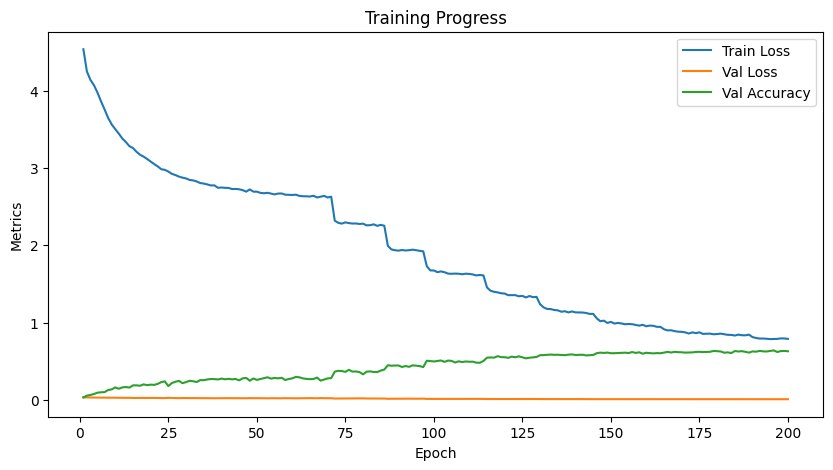

Testing [Test]: 100%|████████████████████████| 79/79 [00:33<00:00,  2.34it/s, test_acc=79.1, test_loss=0.00586]


In [2]:
import sys
import torch.nn as nn
sys.path.append('../tools')
from CIFAR100 import cifar100_trainer
from torchvision.transforms import autoaugment, transforms

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.08, 1.0), ratio=(3. / 4., 4. / 3.)),
    transforms.RandomHorizontalFlip(),
    autoaugment.AutoAugment(policy=autoaugment.AutoAugmentPolicy('cifar10')),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


trainer = cifar100_trainer(model=model, lr=0.1, batch_size=128, epoch=200, train_transforms=train_transforms, test_transforms=test_transforms)
trainer.train()
trainer.test()